In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

from package_DBR import *

# Dynamique du system TCLab

## Données graphique expérimental

| #  | MV      | DV      |
|----|---------|---------|
| a  | 0.13    | 0.08    |
| kp | 0.39    | 0.31    |
| Tu | 11.30s  | 35.96s  |
| Tg | 156.45s | 215.75s |
| t1 | 51.6s   | 90.75s  |
| t2 | 67.74s  | 114.73s |


## Broida model

### MV

(0.0, 1500.0)

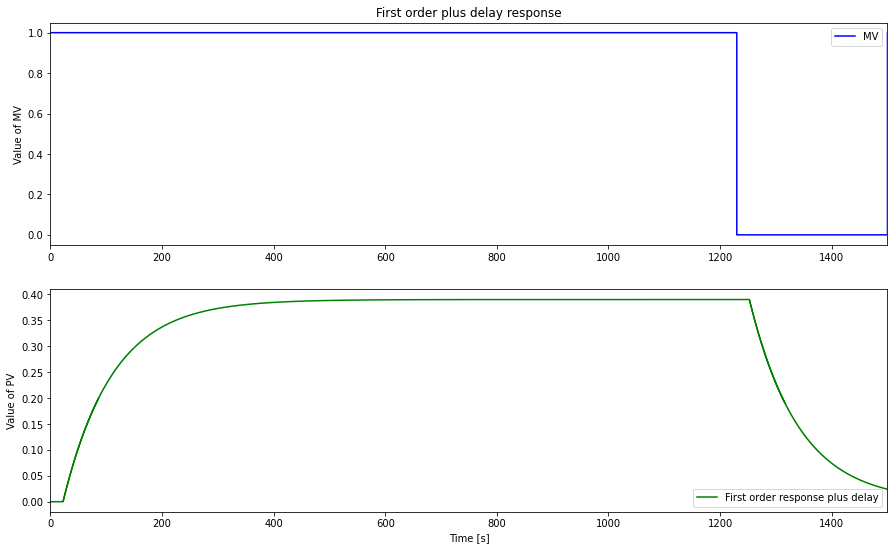

In [10]:


TSim = 1500
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 1, 1230: 0, TSim: 1}

t = []
MV = []

# Parameters
Kp = 0.39
T = 5.5*(67.75-51.6)
theta = (2.8 * 51.6) - (1.8 * 67.75)

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

### DV

(0.0, 2000.0)

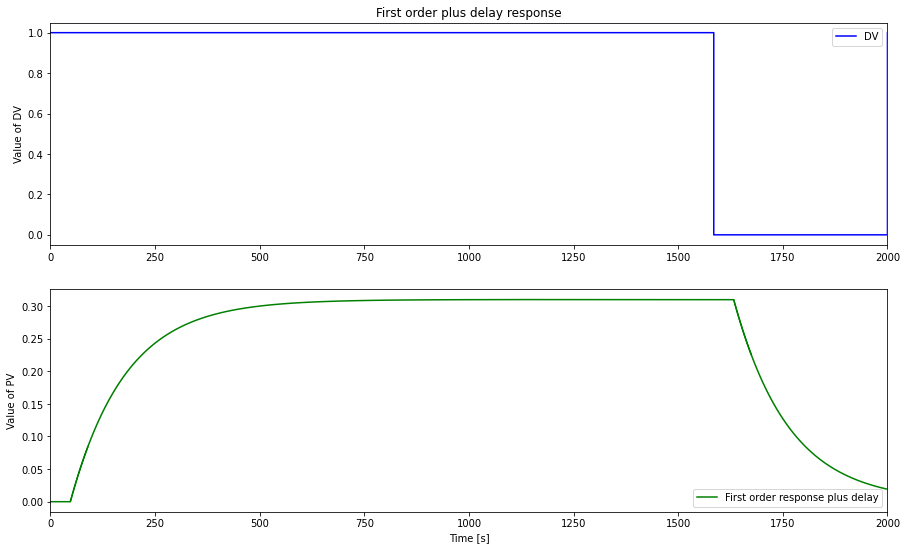

In [8]:
TSim = 2000
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for DV
DVPath = {0: 1, 1585: 0, TSim: 1}

t = []
DV = []

# Parameters
Kp = 0.31
T = 5.5 * (114.73 - 90.75)
theta = (2.8 * 90.75) - (1.8 * 114.73)

# DV is created from DVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(DVPath,t,DV)
    
PV = FOPDT(DV,Kp,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='DV',where='post')
plt.ylabel('Value of DV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  